Python Version: 3.11.4

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df1=pd.read_csv('../DATA/cville_monthly_precip_total.csv')
df1.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,2000,2.35,1.69,2.54,3.80,2.78,7.72,2.98,3.23,4.92,0.01,1.8,2.91,36.73
1,2001,1.92,1.01,4.34,0.95,2.94,5.29,3.38,1.26,2.76,1.49,0.78,2.14,28.26
2,2002,1.43,0.67,3.54,4.37,1.56,2.63,4.39,2.00,3.42,5.17,4.82,3.92,37.92
3,2003,2.62,7.29,4.81,4.61,7.03,6.16,6.90,6.13,10.41,3.32,4.89,4.51,68.68
4,2004,1.56,2.25,1.55,4.31,5.46,5.19,4.38,1.82,8.89,0.87,4.82,2.74,43.84


In [23]:
df2=pd.read_csv('../DATA/cville_monthly_mean_temp.csv')
df2.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,2000,34.0,42.2,49.5,54.4,65.4,72.7,71.7,72.6,65.3,58,43.4,29.7,54.9
1,2001,35.2,40.1,43.0,56.8,62.2,71.6,71.5,75.5,64.9,55.3,52.1,42.7,55.9
2,2002,41.6,40.8,46.5,57.6,61.9,73.6,76.7,76.2,68.9,55.7,45,36.1,56.7
3,2003,31.0,34.1,47.7,55.2,61.0,69.0,74.9,75.7,66.3,55,51.2,37.1,54.9
4,2004,32.1,36.8,48.2,56.4,69.1,71.1,74.9,72.0,68.0,56.6,49,39.1,56.1


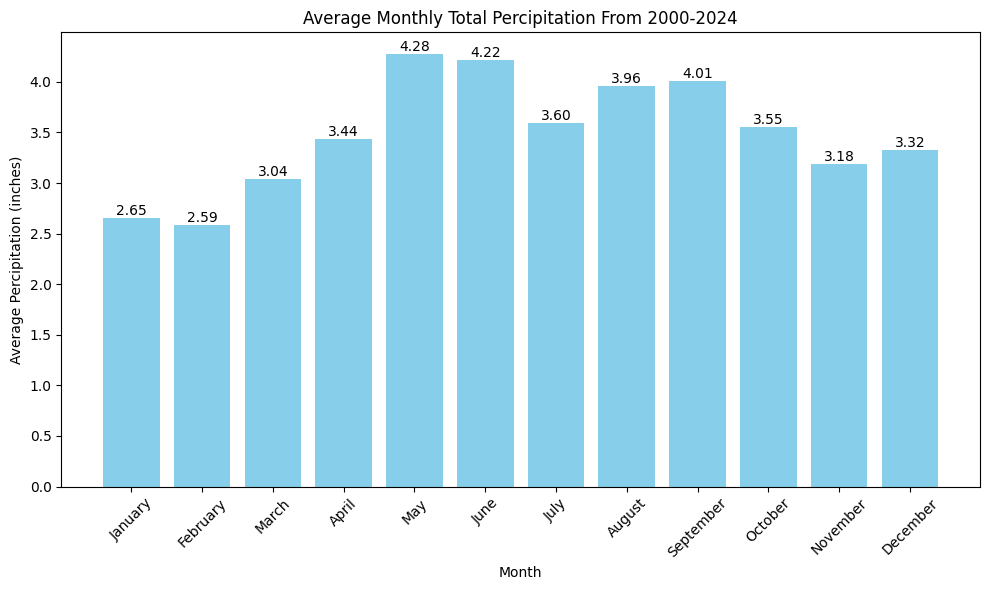

In [24]:
df1.replace('M', pd.NA, inplace=True)

# Drop annual percipitation
if 'Annual' in df1.columns:
    df1 = df1.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df1.columns[1:]:  # Skip the 'Year' column
    df1[month] = pd.to_numeric(df1[month], errors='coerce')

# Calculate the average total percipitation for each month
monthly_avg = df1.iloc[:, 1:].mean()



# Create the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')

# Display exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Average Percipitation (inches)')
plt.title('Average Monthly Total Percipitation From 2000-2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

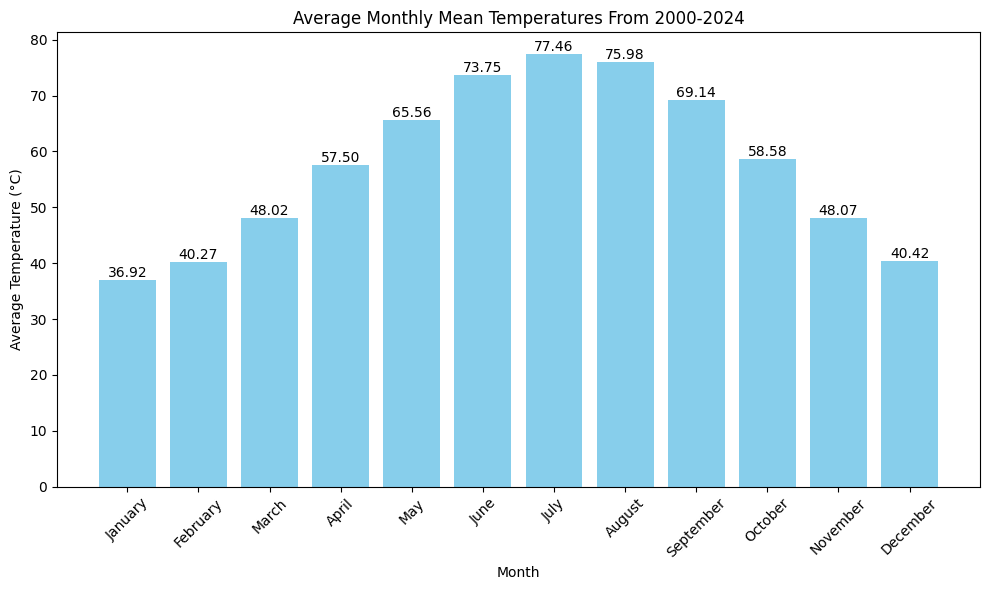

In [25]:
df2.replace('M', pd.NA, inplace=True)

# Drop annual temperature
if 'Annual' in df2.columns:
    df2 = df2.drop(columns=['Annual'])

# Convert the data to numeric (ignores non-numeric values like NaN)
for month in df2.columns[1:]:  # Skip the 'Year' column
    df2[month] = pd.to_numeric(df2[month], errors='coerce')

# Calculate the average mean temperature for each month
monthly_avg = df2.iloc[:, 1:].mean()



# Create the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')

# Display exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Monthly Mean Temperatures From 2000-2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

